<a href="https://colab.research.google.com/github/danielbauer1860/LDS_Project/blob/main/analysis/LexicalDiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd

df_bnc_baby = pd.read_csv('/content/drive/MyDrive/Linguistic Data Science/data/bnc_baby_texts.csv', sep="|")

In [62]:
df_bnc_baby

,text,category
0,"Why do certain images matter to one, and why i...",ACA
1,"In many developing countries, the immunogenici...",ACA
2,Anthony Kenny The British Library 1992 Scholar...,ACA
3,Beforehand he worked as a probation officer fo...,ACA
4,CONTINUITY AND CHANGE are features of every po...,ACA
...,...,...
177,"Artworks THE Friends of Oriel Ynys Mon, Llange...",NEWS
178,THERE will be those who portray the report of ...,NEWS
179,BUCKINGHAM PALACE 30 September: The Princess R...,NEWS
180,The Scottish Landowners' Federation unequivoca...,NEWS


Installing the necessary libraries

In [63]:
!pip install lexical-diversity
!pip install tikzplotlib
!pip install pingouin

I custom function that calculates the MTLD value for a text.

In [64]:
from lexical_diversity import lex_div as ld
import pingouin as pg

def get_lexical_diversity(text, tokenized=False):
  if tokenized == False:
    tokenized_text = ld.tokenize(text)
  else:
    tokenized_text = text
  return ld.mtld(tokenized_text)

The custom function is applied to the original bnc data.

In [65]:
df_bnc_baby['lexical_diversity'] = df_bnc_baby['text'].apply(get_lexical_diversity)
df_bnc_baby

,text,category,lexical_diversity
0,"Why do certain images matter to one, and why i...",ACA,94.882390
1,"In many developing countries, the immunogenici...",ACA,99.991866
2,Anthony Kenny The British Library 1992 Scholar...,ACA,87.542715
3,Beforehand he worked as a probation officer fo...,ACA,73.017840
4,CONTINUITY AND CHANGE are features of every po...,ACA,66.614902
...,...,...,...
177,"Artworks THE Friends of Oriel Ynys Mon, Llange...",NEWS,147.596228
178,THERE will be those who portray the report of ...,NEWS,120.058462
179,BUCKINGHAM PALACE 30 September: The Princess R...,NEWS,116.565881
180,The Scottish Landowners' Federation unequivoca...,NEWS,138.927555


Filtering the BNC to only contain the relevant categories.

In [66]:
df_bnc_baby = df_bnc_baby[df_bnc_baby.category != 'DEM']

A simple boxplot using seaborn. It is then exported to tex format.

<ipython-input-67-a943e8040267>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_bnc_baby, y='lexical_diversity', x='category', palette='Pastel1')


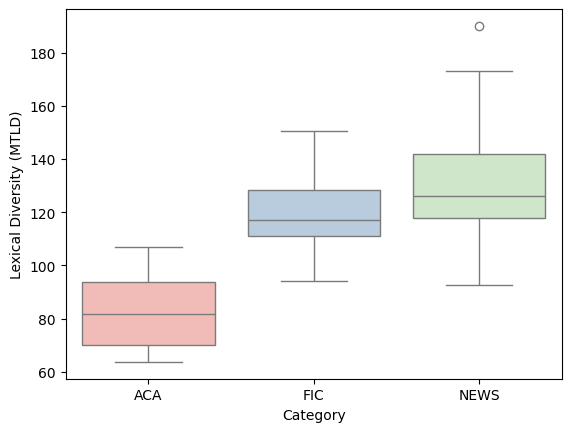

In [67]:
from matplotlib import pyplot as plt
import seaborn as sns
import tikzplotlib

plt.figure()
sns.boxplot(df_bnc_baby, y='lexical_diversity', x='category', palette='Pastel1')
plt.xlabel('Category')
plt.ylabel('Lexical Diversity (MTLD)')

tikzplotlib.save('/content/drive/MyDrive/Linguistic Data Science/graphs/lexical_diversity_bnc_baby.tex')

Custom function to calculate normality for the right column and for the groups.

In [68]:
def test_normality(group):
    return pg.normality(group['lexical_diversity'])

The original BNC lexical diversity is investigated for normality.

In [69]:
df_bnc_baby.groupby('category').apply(test_normality)

,,W,pval,normal
category,,,,
ACA,lexical_diversity,0.944347,0.119125,True
FIC,lexical_diversity,0.973142,0.725147,True
NEWS,lexical_diversity,0.965312,0.011480,False


For equal variance (Levene's test):

In [70]:
levene_test = pg.homoscedasticity(df_bnc_baby, dv='lexical_diversity', group='category', method='levene', alpha=0.05)

print(levene_test)

               W     pval  equal_var
levene  3.187356  0.04411      False


In [71]:
kruskal_wallis = pg.kruskal(df_bnc_baby, dv='lexical_diversity', between='category', detailed=True)

print(kruskal_wallis)

           Source  ddof1          H         p-unc
Kruskal  category      2  72.121889  2.182383e-16


# Newspaper Output

In [72]:
df_news_bnc = df_bnc_baby[df_bnc_baby.category == 'NEWS']
df_news_2e = pd.read_csv('/content/drive/MyDrive/Linguistic Data Science/data/2epoch-news-output.csv', sep="|")
df_news_4e = pd.read_csv('/content/drive/MyDrive/Linguistic Data Science/data/4epoch-news-output.csv', sep="|")
df_news_8e = pd.read_csv('/content/drive/MyDrive/Linguistic Data Science/data/8epoch-news-output.csv', sep="|")


#since I did not select the correct seperator, these three dataframes require additional processing in order to extract the output
substrings = [',ACA', ',FIC', ',NEWS']

for substring in substrings:
  df_news_2e[f'output{substring}'] = df_news_2e['output,prompt_category,prompt'].apply(lambda x: x[:x.find(substring)] if substring in x else x)
df_news_2e['output'] = df_news_2e[['output,ACA', 'output,FIC', 'output,NEWS']].min(axis=1)
df_news_2e.drop(columns=['output,ACA', 'output,FIC', 'output,NEWS', 'output,prompt_category,prompt'], inplace=True)
df_news_2e['type'] = '2 Epochs'

for substring in substrings:
  df_news_4e[f'output{substring}'] = df_news_4e['output,prompt_category,prompt'].apply(lambda x: x[:x.find(substring)] if substring in x else x)
df_news_4e['output'] = df_news_4e[['output,ACA', 'output,FIC', 'output,NEWS']].min(axis=1)
df_news_4e.drop(columns=['output,ACA', 'output,FIC', 'output,NEWS', 'output,prompt_category,prompt'], inplace=True)
df_news_4e['type'] = '4 Epochs'

for substring in substrings:
  df_news_8e[f'output{substring}'] = df_news_8e['output,prompt_category,prompt'].apply(lambda x: x[:x.find(substring)] if substring in x else x)
df_news_8e['output'] = df_news_8e[['output,ACA', 'output,FIC', 'output,NEWS']].min(axis=1)
df_news_8e.drop(columns=['output,ACA', 'output,FIC', 'output,NEWS', 'output,prompt_category,prompt'], inplace=True)
df_news_8e['type'] = '8 Epochs'

In [73]:
df_news_bnc['output'] = df_news_bnc['text']
df_news_bnc['type'] = 'BNC'

df_news_bnc.drop(columns=['text', 'category'], inplace=True)

<ipython-input-73-2e4ab861dce5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_bnc['output'] = df_news_bnc['text']
<ipython-input-73-2e4ab861dce5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_bnc['type'] = 'BNC'
<ipython-input-73-2e4ab861dce5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_bn

In [74]:
df_news_trained = pd.concat([df_news_bnc, df_news_2e, df_news_4e, df_news_8e], ignore_index=True)
df_news_trained['lexical_diversity'] = df_news_trained['output'].apply(get_lexical_diversity)
df_news_trained

,lexical_diversity,output,type
0,148.793243,What is the use of going to open beaches when ...,BNC
1,92.610000,One has to distinguish between the individual ...,BNC
2,145.532537,"Abandoned fawns have been reared on a bottle, ...",BNC
3,119.434701,A SCANNING system developed by astronomers for...,BNC
4,132.973866,WILD BOAR once roamed the fields and forests o...,BNC
...,...,...,...
272,161.333333,"Of course, I know perfectly well why the Depar...",8 Epochs
273,145.933828,Demonstrating climate to be the primary cause ...,8 Epochs
274,141.540631,The reason behind this concentrated specialist...,8 Epochs
275,179.200000,Scanner appeal co-ordinator Jack Froggatt said...,8 Epochs


<ipython-input-75-6f9867e6ce51>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_news_trained, y='lexical_diversity', x='type', palette='Pastel1')


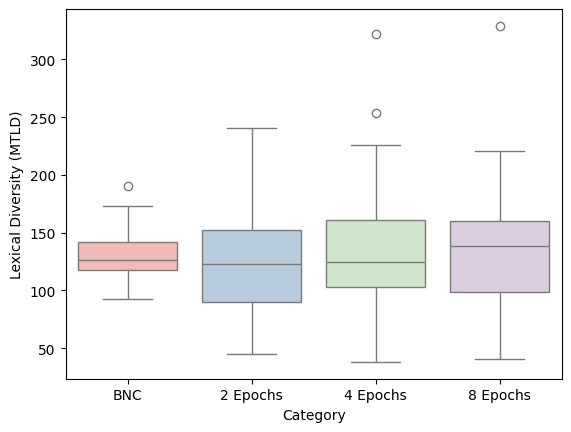

In [75]:
plt.figure()
sns.boxplot(df_news_trained, y='lexical_diversity', x='type', palette='Pastel1')
plt.xlabel('Category')
plt.ylabel('Lexical Diversity (MTLD)')

tikzplotlib.save('/content/drive/MyDrive/Linguistic Data Science/graphs/lexical_diversity_news.tex')

In [76]:
levene_test = pg.homoscedasticity(df_news_trained, dv='lexical_diversity', group='type', method='levene', alpha=0.05)

print(levene_test)

               W          pval  equal_var
levene  13.58966  2.736666e-08      False


In [77]:
df_news_trained.groupby('type').apply(test_normality)

,,W,pval,normal
type,,,,
2 Epochs,lexical_diversity,0.963304,0.068329,True
4 Epochs,lexical_diversity,0.952560,0.020584,False
8 Epochs,lexical_diversity,0.952584,0.020637,False
BNC,lexical_diversity,0.965312,0.011480,False


In [78]:
kruskal_wallis = pg.kruskal(df_news_trained, dv='lexical_diversity', between='type', detailed=True)

print(kruskal_wallis)

        Source  ddof1         H   p-unc
Kruskal   type      3  2.018385  0.5686


## Comparing only the generated data

In [79]:
df_news_trained[df_news_trained['type'] != 'BNC']

,lexical_diversity,output,type
97,85.655156,Apart from Wollen's historical and theoretical...,2 Epochs
98,45.303035,We illustrate reduction to upper Hessenberg fo...,2 Epochs
99,228.236164,But it always seemed to me more important from...,2 Epochs
100,111.315575,Conclusions: Policy Rhetoric and Structural Re...,2 Epochs
101,83.050476,I was not prepared to travel 140 miles to and ...,2 Epochs
...,...,...,...
272,161.333333,"Of course, I know perfectly well why the Depar...",8 Epochs
273,145.933828,Demonstrating climate to be the primary cause ...,8 Epochs
274,141.540631,The reason behind this concentrated specialist...,8 Epochs
275,179.200000,Scanner appeal co-ordinator Jack Froggatt said...,8 Epochs


In [80]:
levene_test = pg.homoscedasticity(df_news_trained[df_news_trained['type'] != 'BNC'], dv='lexical_diversity', group='type', method='levene', alpha=0.05)

print(levene_test)

               W      pval  equal_var
levene  0.146877  0.863505       True


In [81]:
kruskal_wallis = pg.kruskal(df_news_trained[df_news_trained['type'] != 'BNC'], dv='lexical_diversity', between='type', detailed=True)

print(kruskal_wallis)

        Source  ddof1         H     p-unc
Kruskal   type      2  1.347772  0.509724


# Academic Output

In [82]:
df_aca_bnc = df_bnc_baby[df_bnc_baby.category == 'ACA']
df_aca_2e = pd.read_csv('/content/drive/MyDrive/Linguistic Data Science/data/2epoch-academic-output.csv', sep="|")
df_aca_4e = pd.read_csv('/content/drive/MyDrive/Linguistic Data Science/data/4epoch-academic-output.csv', sep="|")
df_aca_8e = pd.read_csv('/content/drive/MyDrive/Linguistic Data Science/data/8epoch-academic-output.csv', sep="|")

df_aca_2e['type'] ="2 Epochs"
df_aca_4e['type'] ="4 Epochs"
df_aca_8e['type'] ="8 Epochs"

In [83]:
df_aca_bnc['output'] = df_aca_bnc['text']
df_aca_bnc['type'] = 'BNC'

df_aca_bnc.drop(columns=['text', 'category'], inplace=True)

<ipython-input-83-715455ccc418>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aca_bnc['output'] = df_aca_bnc['text']
<ipython-input-83-715455ccc418>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aca_bnc['type'] = 'BNC'
<ipython-input-83-715455ccc418>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aca_bnc.dr

In [84]:
df_aca_trained = pd.concat([df_aca_bnc, df_aca_2e, df_aca_4e, df_aca_8e], ignore_index=True)
df_aca_trained['lexical_diversity'] = df_aca_trained['output'].apply(get_lexical_diversity)
df_aca_trained

,lexical_diversity,output,type,prompt_category,prompt
0,94.882390,"Why do certain images matter to one, and why i...",BNC,NaN,NaN
1,99.991866,"In many developing countries, the immunogenici...",BNC,NaN,NaN
2,87.542715,Anthony Kenny The British Library 1992 Scholar...,BNC,NaN,NaN
3,73.017840,Beforehand he worked as a probation officer fo...,BNC,NaN,NaN
4,66.614902,CONTINUITY AND CHANGE are features of every po...,BNC,NaN,NaN
...,...,...,...,...,...
205,127.602177,"On the contrary, they add to the pleasure of s...",8 Epochs,NEWS,"On the contrary, they add to the pleasure of s..."
206,107.551402,"The publisher is Christopher Helm, the price £...",8 Epochs,NEWS,"The publisher is Christopher Helm, the price £..."
207,22.753513,The text has been cut quite wantonly and only ...,8 Epochs,NEWS,The text has been cut quite wantonly and only ...
208,182.553920,OVERNIGHT FILE PAGE soc An opening at the Met ...,8 Epochs,NEWS,OVERNIGHT FILE PAGE soc An opening at the Met ...


<ipython-input-85-cebc1483de08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_aca_trained, y='lexical_diversity', x='type', palette='Pastel1')


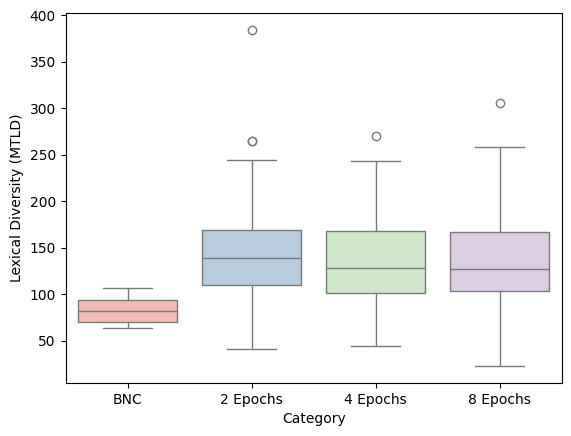

In [85]:
plt.figure()
sns.boxplot(df_aca_trained, y='lexical_diversity', x='type', palette='Pastel1')
plt.xlabel('Category')
plt.ylabel('Lexical Diversity (MTLD)')

tikzplotlib.save('/content/drive/MyDrive/Linguistic Data Science/graphs/lexical_diversity_aca.tex')

In [86]:
df_aca_trained.groupby('type').apply(test_normality)

,,W,pval,normal
type,,,,
2 Epochs,lexical_diversity,0.924873,0.001212,False
4 Epochs,lexical_diversity,0.967632,0.111642,True
8 Epochs,lexical_diversity,0.963210,0.067604,True
BNC,lexical_diversity,0.944347,0.119125,True


In [87]:
levene_test = pg.homoscedasticity(df_aca_trained, dv='lexical_diversity', group='type', method='levene', alpha=0.05)

print(levene_test)

               W      pval  equal_var
levene  6.918939  0.000185      False


In [88]:
kruskal_wallis = pg.kruskal(df_aca_trained, dv='lexical_diversity', between='type', detailed=True)

print(kruskal_wallis)

        Source  ddof1          H         p-unc
Kruskal   type      3  40.216148  9.588200e-09


## Comparing only the generated data

In [89]:
df_aca_trained[df_aca_trained['type'] != 'BNC']

,lexical_diversity,output,type,prompt_category,prompt
30,119.090164,"There is also a connection between these two, ...",2 Epochs,ACA,"There is also a connection between these two, ..."
31,157.783415,No doubt a finder of perishable commodities wo...,2 Epochs,ACA,No doubt a finder of perishable commodities wo...
32,67.334862,"A combined transformation In a recent paper, H...",2 Epochs,ACA,"A combined transformation In a recent paper, H..."
33,138.857436,The relation between high activity of TNF and ...,2 Epochs,ACA,The relation between high activity of TNF and ...
34,121.000000,If the interviewee is very nervous it can help...,2 Epochs,ACA,If the interviewee is very nervous it can help...
...,...,...,...,...,...
205,127.602177,"On the contrary, they add to the pleasure of s...",8 Epochs,NEWS,"On the contrary, they add to the pleasure of s..."
206,107.551402,"The publisher is Christopher Helm, the price £...",8 Epochs,NEWS,"The publisher is Christopher Helm, the price £..."
207,22.753513,The text has been cut quite wantonly and only ...,8 Epochs,NEWS,The text has been cut quite wantonly and only ...
208,182.553920,OVERNIGHT FILE PAGE soc An opening at the Met ...,8 Epochs,NEWS,OVERNIGHT FILE PAGE soc An opening at the Met ...


In [90]:
levene_test = pg.homoscedasticity(df_aca_trained[df_aca_trained['type'] != 'BNC'], dv='lexical_diversity', group='type', method='levene', alpha=0.05)

print(levene_test)

               W      pval  equal_var
levene  0.229198  0.795407       True


In [91]:
kruskal_wallis = pg.kruskal(df_aca_trained[df_aca_trained['type'] != 'BNC'], dv='lexical_diversity', between='type', detailed=True)

print(kruskal_wallis)

        Source  ddof1         H    p-unc
Kruskal   type      2  1.214637  0.54481


# Fictional Output

In [92]:
df_fic_bnc = df_bnc_baby[df_bnc_baby.category == 'FIC']
df_fic_2e = pd.read_csv('/content/drive/MyDrive/Linguistic Data Science/data/2epoch-fic-output.csv', sep="|")
df_fic_4e = pd.read_csv('/content/drive/MyDrive/Linguistic Data Science/data/4epoch-fic-output.csv', sep="|")
df_fic_8e = pd.read_csv('/content/drive/MyDrive/Linguistic Data Science/data/8epoch-fic-output.csv', sep="|")

df_fic_2e['type'] ="2 Epochs"
df_fic_4e['type'] ="4 Epochs"
df_fic_8e['type'] ="8 Epochs"

In [93]:
df_fic_bnc['output'] = df_fic_bnc['text']
df_fic_bnc['type'] = 'BNC'

df_fic_bnc.drop(columns=['text', 'category'], inplace=True)

<ipython-input-93-4265328cdb7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fic_bnc['output'] = df_fic_bnc['text']
<ipython-input-93-4265328cdb7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fic_bnc['type'] = 'BNC'
<ipython-input-93-4265328cdb7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fic_bnc.dr

In [94]:
df_fic_trained = pd.concat([df_fic_bnc, df_fic_2e, df_fic_4e, df_fic_8e], ignore_index=True)
df_fic_trained['lexical_diversity'] = df_fic_trained['output'].apply(get_lexical_diversity)
df_fic_trained

,lexical_diversity,output,type,prompt_category,prompt
0,115.714630,"Blood in her factory; another body found, and ...",BNC,NaN,NaN
1,101.838852,"One Sunday morning, about a week after I had s...",BNC,NaN,NaN
2,123.645333,It was well into the charter business's low se...,BNC,NaN,NaN
3,150.692217,"MONDAY, 19 JULY 1965 From her office window, i...",BNC,NaN,NaN
4,108.732293,"Jetting across the Atlantic, after two years i...",BNC,NaN,NaN
...,...,...,...,...,...
200,178.161978,‘They wasted billions on that.’ They mightn't ...,8 Epochs,NEWS,‘They wasted billions on that.’ They mightn't ...
201,97.150839,Bob Kernohan would not object to being called ...,8 Epochs,NEWS,Bob Kernohan would not object to being called ...
202,149.822306,"They begged Rytasha for reimbursement, but non...",8 Epochs,NEWS,"They begged Rytasha for reimbursement, but non..."
203,183.441481,More than 500 staff and 450 GPs who are believ...,8 Epochs,NEWS,More than 500 staff and 450 GPs who are believ...


<ipython-input-95-f518de456fdf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_fic_trained, y='lexical_diversity', x='type', palette='Pastel1')


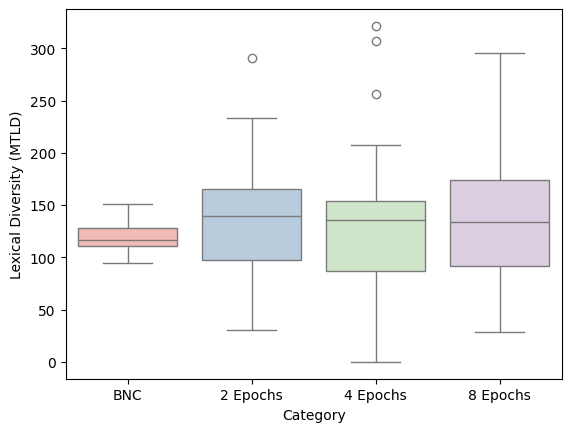

In [95]:
plt.figure()
sns.boxplot(df_fic_trained, y='lexical_diversity', x='type', palette='Pastel1')
plt.xlabel('Category')
plt.ylabel('Lexical Diversity (MTLD)')

tikzplotlib.save('/content/drive/MyDrive/Linguistic Data Science/graphs/lexical_diversity_fic.tex')

In [96]:
df_fic_trained.groupby('type').apply(test_normality)

,,W,pval,normal
type,,,,
2 Epochs,lexical_diversity,0.980624,0.455511,True
4 Epochs,lexical_diversity,0.963278,0.068127,True
8 Epochs,lexical_diversity,0.978485,0.367869,True
BNC,lexical_diversity,0.973142,0.725147,True


In [97]:
levene_test = pg.homoscedasticity(df_fic_trained, dv='lexical_diversity', group='type', method='levene', alpha=0.05)

print(levene_test)

               W      pval  equal_var
levene  7.375801  0.000103      False


In [98]:
welch_anova = pg.welch_anova(df_fic_trained, dv='lexical_diversity', between='type')

print(welch_anova)

  Source  ddof1       ddof2         F     p-unc       np2
0   type      3  111.455858  3.017586  0.032917  0.010365


## Comparing only the generated data

In [99]:
df_fic_trained[df_fic_trained['type'] != 'BNC']

,lexical_diversity,output,type,prompt_category,prompt
25,71.514791,In response to the e.m.f. of a current through...,2 Epochs,ACA,In response to the e.m.f.
26,121.338257,It is the same — and we should not be surprise...,2 Epochs,ACA,It is the same — and we should not be surprise...
27,147.471602,It should be obvious why a single structural o...,2 Epochs,ACA,It should be obvious why a single structural o...
28,68.744128,"This view, whereby science progresses through ...",2 Epochs,ACA,"This view, whereby science progresses through ..."
29,88.036012,The relation between high activity of TNF and ...,2 Epochs,ACA,The relation between high activity of TNF and ...
...,...,...,...,...,...
200,178.161978,‘They wasted billions on that.’ They mightn't ...,8 Epochs,NEWS,‘They wasted billions on that.’ They mightn't ...
201,97.150839,Bob Kernohan would not object to being called ...,8 Epochs,NEWS,Bob Kernohan would not object to being called ...
202,149.822306,"They begged Rytasha for reimbursement, but non...",8 Epochs,NEWS,"They begged Rytasha for reimbursement, but non..."
203,183.441481,More than 500 staff and 450 GPs who are believ...,8 Epochs,NEWS,More than 500 staff and 450 GPs who are believ...


In [100]:
levene_test = pg.homoscedasticity(df_fic_trained[df_fic_trained['type'] != 'BNC'], dv='lexical_diversity', group='type', method='levene', alpha=0.05)

print(levene_test)

               W      pval  equal_var
levene  0.620617  0.538778       True


In [101]:
anova = pg.anova(df_fic_trained[df_fic_trained['type'] != 'BNC'], dv='lexical_diversity', between='type')

print(anova)

  Source  ddof1  ddof2         F     p-unc       np2
0   type      2    177  0.230826  0.794116  0.002601


# Comparison between the 8 Epoch versions

In [102]:
df_fic_trained['text_type'] = 'FIC'
df_aca_trained['text_type'] = 'ACA'
df_news_trained['text_type'] = 'NEWS'


df_8_epochs = pd.concat([df_fic_trained[df_fic_trained['type'] == '8 Epochs'], df_aca_trained[df_aca_trained['type'] == '8 Epochs'], df_news_trained[df_news_trained['type'] == '8 Epochs']], ignore_index=True)

df_8_epochs

,lexical_diversity,output,type,prompt_category,prompt,text_type
0,139.386157,Conclusions: Policy Rhetoric and Structural Re...,8 Epochs,ACA,Conclusions: Policy Rhetoric and Structural Re...,FIC
1,243.632941,"The effects of humans can go far beyond this, ...",8 Epochs,ACA,"The effects of humans can go far beyond this, ...",FIC
2,82.226089,Apart from Wollen's historical and theoretical...,8 Epochs,ACA,Apart from Wollen's historical and theoretical...,FIC
3,95.443172,But it always seemed to me more important from...,8 Epochs,ACA,But it always seemed to me more important from...,FIC
4,232.000000,"However, while shoplifting occurred in the pas...",8 Epochs,ACA,"However, while shoplifting occurred in the pas...",FIC
...,...,...,...,...,...,...
175,161.333333,"Of course, I know perfectly well why the Depar...",8 Epochs,NaN,NaN,NEWS
176,145.933828,Demonstrating climate to be the primary cause ...,8 Epochs,NaN,NaN,NEWS
177,141.540631,The reason behind this concentrated specialist...,8 Epochs,NaN,NaN,NEWS
178,179.200000,Scanner appeal co-ordinator Jack Froggatt said...,8 Epochs,NaN,NaN,NEWS


In [103]:
df_8_epochs.groupby('text_type').apply(test_normality)

,,W,pval,normal
text_type,,,,
ACA,lexical_diversity,0.963210,0.067604,True
FIC,lexical_diversity,0.978485,0.367869,True
NEWS,lexical_diversity,0.952584,0.020637,False


In [104]:
levene_test = pg.homoscedasticity(df_8_epochs, dv='lexical_diversity', group='text_type', method='levene', alpha=0.05)

print(levene_test)

               W      pval  equal_var
levene  0.859785  0.425013       True


In [105]:
kruskal_wallis = pg.kruskal(df_8_epochs, dv='lexical_diversity', between='text_type', detailed=True)

print(kruskal_wallis)

            Source  ddof1         H     p-unc
Kruskal  text_type      2  0.475592  0.788363
